<H1><CENTER> Machine Learning Lab - Exercise Sheet 4 <br /></CENTER></H1>
<H2><CENTER> Author: Sebastian Pineda Arango  <br />
ID: 246098<br />
Universität Hildesheim - Data Analytics Master </CENTER></H2>

<img src="https://www.uni-hildesheim.de/typo3conf/ext/unihildesheim/Resources/Public/Images/logo-uni.svgz" width="100">

## Exercise Sheet 4

We donwload the following datasets:

- Airfare and demand (http://www.stat.ulf.edu/winter/data/airq402.dat)
- Wine Quality 
(http://archive.ics.uci.edu/ml/datasets/Wine+Quality)





In this notebook, we aim to preprocess two datasets and then create a prediction model (logistc regression) training using different techniques. In this case, the first dataset is about Bank Marketing (from now on, it is ogint be called _Dataset1_). The second dataset corresponds to Occupancy detection (from now on, it is going to be called _Dataset2_).

For modelling, we am to implement four different apporaches to find the parameters of the logistic function:

* Stochastic gradient descent
* Stochastic gradient descent with momentum
* Stochastic gradient descent with bold driver
* Stochastic gradient descent with adagrad.

## Preprocessing


The first part of this notebook focuses in reading the data and preprocessing it  through following transformations:

* Converting non numeric values to numeric values
* Drop rows
* Splitting train and test set



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dataset1 = pd.read_csv("bank-full.csv", sep=";")
print("Size of dataset1 before dropping NA:", dataset1.shape)
dataset1 = dataset1.dropna()
print("Size of dataset1 after dropping NA:", dataset1.shape)
dataset1.head()


Size of dataset1 before dropping NA: (45211, 17)
Size of dataset1 after dropping NA: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
dataset2 = pd.read_csv("occupancy_data/datatraining.txt", sep=",")
print("Size of dataset2 before dropping NA:", dataset2.shape)
dataset2 = dataset2.dropna()
print("Size of dataset2 after dropping NA:", dataset2.shape)
dataset2.head()

Size of dataset2 before dropping NA: (8143, 7)
Size of dataset2 after dropping NA: (8143, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## Exploratory analysis


We perform a quick exploratory analysis of the data. First, we describe the numerical data using a python function. Then, we make hisotgram plots for all the categorical variables, so that we can see how their values are distributed.

In [3]:
dataset1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


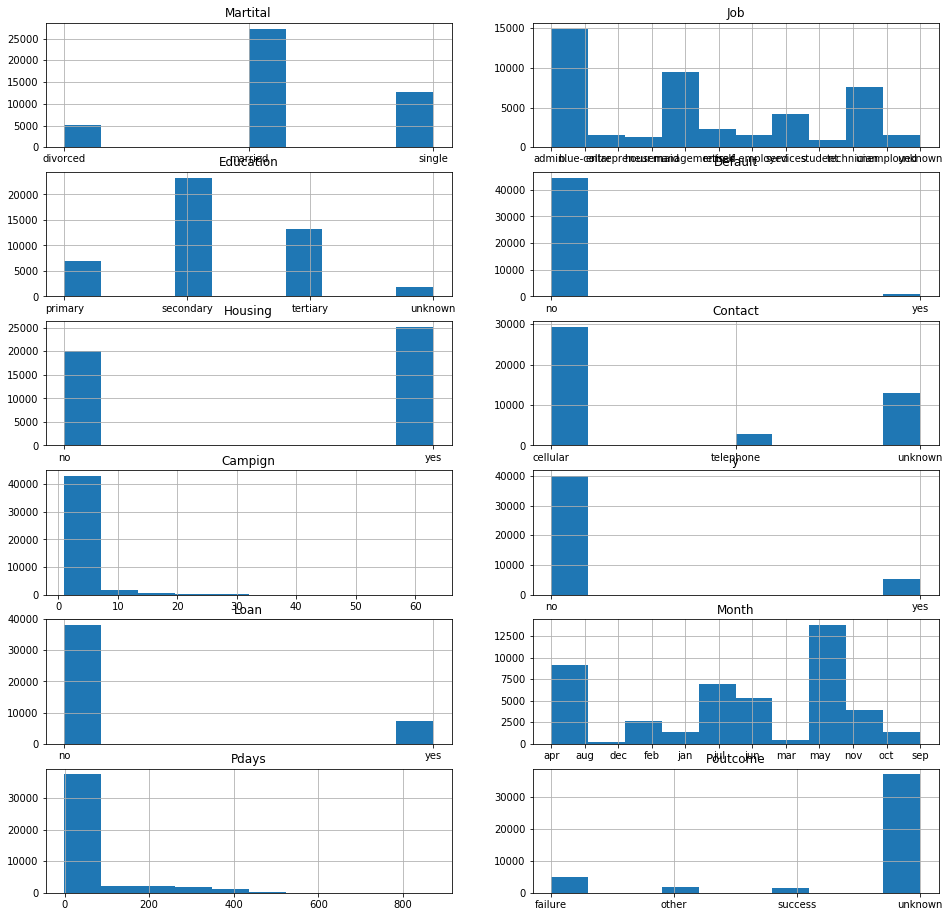

In [4]:
fig, ax = plt.subplots(6,2, figsize=(16,16))
ax[0,0].set_title('Martital')
dataset1.marital.hist(ax=ax[0,0])
ax[0,1].set_title('Job')
dataset1.job.hist(ax=ax[0,1])
ax[1,0].set_title('Education')
dataset1.education.hist(ax=ax[1,0])
ax[1,1].set_title('Default')
dataset1.default.hist(ax=ax[1,1])
ax[2,0].set_title('Housing')
dataset1.housing.hist(ax=ax[2,0])
ax[2,1].set_title('Contact')
dataset1.contact.hist(ax=ax[2,1])
ax[3,0].set_title('Campign')
dataset1.campaign.hist(ax=ax[3,0])
ax[3,1].set_title('y')
dataset1.y.hist(ax=ax[3,1])
ax[4,0].set_title('Loan')
dataset1.loan.hist(ax=ax[4,0])
ax[4,1].set_title('Month')
dataset1.month.hist(ax=ax[4,1])
ax[5,0].set_title('Pdays')
dataset1.pdays.hist(ax=ax[5,0])
ax[5,1].set_title('Poutcome')
dataset1.poutcome.hist(ax=ax[5,1])

From the previous analysis for the dataset1, we can have some insights the following:

* There are 8 categorical variables (marital, job, education, contact, poutcome). This are converted to numerical using one hot encoding.

* There are 3 binary variables (default, housing, loan), which has two possible values (yes/no). They are converted to 1 (if y is equal to 'yes') or 0 (if y is equal to 'no').

* There are 2 ordinal variables (month and campaign). They are going to be converted to numbers directly.

* Some categorical variables have 'unknown' class. They are handled as a new category, instead of replacing or dropping these values.

* pdays have a lot of values equals to -1

Now we describe the second dataset.


In [5]:
dataset2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


## Encoding of features

We want now to convert all the categorical features of dataset1 to numbers using one-hot encoding. The ordinal features like 'month' and 'campaing' are converted to number.

In [6]:
categorical_features = ['marital', 'job', 'education', 'contact', 'poutcome']
print("Size before encoding:", dataset1.shape)
dataset1 = pd.get_dummies( dataset1, columns = categorical_features)
print("Size after encoding:",dataset1.shape)
dataset1.head()

Size before encoding: (45211, 17)
Size after encoding: (45211, 38)


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [7]:
#converting the month to number
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_num = [months.index(i) for i in dataset1.month]

dataset1.month = month_num
dataset1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,4,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,4,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,4,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,4,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,4,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


The column _month_ has been now converted to number. We also want to convert the binary variables (i.e. housing, loan,...) to numbers. This varables are originally (yes/no) strings, therefore we have to perform a further step to get the binary value as follows.

In [8]:
binary_tf = lambda x: int(x=="yes")

dataset1.housing = dataset1.housing.apply(binary_tf)
dataset1.loan = dataset1.loan.apply(binary_tf)
dataset1.default = dataset1.default.apply(binary_tf)
dataset1.y = dataset1.y.apply(binary_tf)

dataset1.head()


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,4,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,4,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,4,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,4,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,4,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


## Splitting train-test data

We want th split both datasets in train and test data. For that, we create a split_train_test function. Then, the function is used with a train/test split corresponding to 80%/20%.

In [9]:

def split_train_test(data, train_pct, features, target):
    
    '''This functions divides "data"  in train and test set.
    The percentage give to the train data is determined by "train_pct".
    The "features" argument determine a list of features to consider.
    The "target" arugment indicates the the variable to predict.'''
    
    #getting the total number of training samples
    data_size = data.shape[0]
    train_size = int(train_pct*data_size)

    #shuffling indexes to separate train and test randoming
    idx = np.arange(0,data_size)
    np.random.shuffle(idx)

    #creating test indexes
    train_idx = idx[:train_size]

    #creating test indexes
    test_idx = idx[train_size:]

    #selecting train data (features)
    X_train = data[features].iloc[train_idx,]

    #selecting train data (target)
    y_train = data[target].iloc[train_idx,]

    #selecting test data (features)
    X_test = data[features].iloc[test_idx,]

    #selecting test data (target)
    y_test = data[target].iloc[test_idx,]
    
    #stacking a column of ones to the training and test set
    X_train = np.hstack((X_train, np.ones((X_train.shape[0],1))))
    X_test = np.hstack((X_test, np.ones((X_test.shape[0],1))))
    
    return X_train, y_train, X_test, y_test


In [10]:
#using split_train_test function to split the dataset1
features1 = list(dataset1.columns) #list of features
target1 = 'y'
features1.remove('y')
X_train1, y_train1, X_test1, y_test1 = split_train_test(dataset1, 0.8, features1, target1)

print("Verifying dataset sizes ...")
print("Size train set for dataset1:", X_train1.shape)
print("Size test set for dataset1:", X_test1.shape)


#using split_train_test function to split the dataset2
features2 = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'] #list of features
target2 = 'Occupancy'
X_train2, y_train2, X_test2, y_test2 = split_train_test(dataset2, 0.8, features2, target2)
print("Size train set for dataset2:", X_train2.shape)
print("Size test set for dataset2:", X_test2.shape)




Verifying dataset sizes ...
Size train set for dataset1: (36168, 38)
Size test set for dataset1: (9043, 38)
Size train set for dataset2: (6514, 6)
Size test set for dataset2: (1629, 6)


## Linear classification with gradient ascent

### Exercise 1: SGA

First we want to perform stochastic gradient ascent and stochastic gradient ascent with momentum. In stochastic gradient ascent,we calculate the gradient using only one sample at a time. If we use the momentum addition, we calcualte the current gradient update as a weighted sum of the gradient and the last gradient. It means, with momentum, the update would be:

$\bigtriangleup \beta_i = \alpha\bigtriangleup \beta_{i-1} + \mu \bigtriangledown_{\beta} l$

As follows, we implement different functions to performe the stochastic gradient descent (ascent). 

* Prediction function:

$\hat{y} = \frac{1}{1+e^{-x\beta}}$

* Loss function:

$l = \sum_{i}^n {ylog(\hat{y}) + (1-y)log(1-\hat{y})}$

Where $y$is the ground truth.

* Gradient of loss function respect to $\beta$:

$\bigtriangledown_{\beta} l = X(y-\hat{y})$

Loss in this case is refered programamtically to the log-likelihood that we want to optimize. However we must take into account that $loss = -(log\_likelihood)$.

In [11]:
def loss_function(y, y_pred):
    
    '''This function implements the loss function (logitic loss9)'''
    
    loss=  -(np.sum( np.log(y_pred[y==1,]))  + np.sum(np.log(1-y_pred[y==0,])))
    return loss

def grad(X, y, beta):

    '''This function implements the gradient of the logistic loss'''
    
    grad=X.T*(y-sigmoid(X, beta))
    return grad


def sigmoid (X, beta):
    
    '''This function implements the sigmoid function (prediction function for
    logistic regression)'''
    
    z = X*beta
    y = 1.0/(1.0+np.exp(-z))
    return y


    return out
    
def train (X_train, y_train, X_test, y_test, grad_func, max_iter, learning_rate=0.000000001):
    
    '''This function trains a logistic function using Stochastic gradient descent'''
    
    #casting to type numpy.matrix
    X_train = np.matrix(X_train)
    y_train = np.matrix(y_train).T
    X_test =np.matrix(X_test)
    y_test = np.matrix(y_test).T
    
    #initializing beta
    beta =  np.matrix(np.zeros((X_train.shape[1],1)))
    
    #training set size
    n_samples_train = X_train.shape[0]

    #index list
    idx = np.arange(0,n_samples_train)
    
    #initilaizing lists
    loss_train_list = []
    loss_test_list = []
    diff_list = []
    last_loss_train = 0
    
    #iterating over max_iter
    for i in range(max_iter):
        
        if(i %10==0):
            print("epoch:", i)
        
        #shuffling dataset indexes
        np.random.shuffle(idx)

        #calculating stochastic gradient using one sample per time
        for j in idx:
            #updating parameters
            g=grad_func(X_train[j,:], y_train[j], beta)
            beta = beta + learning_rate*g
        
        #saving values to track performance
        loss_train = loss_function(y_train, sigmoid(X_train, beta))
        loss_test = loss_function(y_test, sigmoid(X_test, beta))
        diff = np.abs(last_loss_train-loss_train)
        last_loss_train = loss_train

        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)
        diff_list.append(diff)

    return beta, loss_train_list, loss_test_list, diff_list

   
def train_with_momentum (X_train, y_train, X_test, y_test, grad_func, max_iter, learning_rate=0.000000001):
    
    '''This function trains a logistic regression model using stochastic gradient descent
    and momentum to boost the convergence.'''
    
    #casting to type numpy.matrix
    X_train = np.matrix(X_train)
    y_train = np.matrix(y_train).T
    X_test =np.matrix(X_test)
    y_test = np.matrix(y_test).T
    
    #initializing beta
    beta =  np.matrix(np.zeros((X_train.shape[1],1)))
    
    #training set size
    n_samples_train = X_train.shape[0]

    #index list
    idx = np.arange(0,n_samples_train)
    
    #initilaizing lists
    loss_train_list = []
    loss_test_list = []
    diff_list = []
    
    last_loss_train =0

    
    #iterating over max_iter
    for i in range(max_iter):
        
        if(i %25==0):
            print("epoch:", i)
        
        #shuffling dataset indexes
        np.random.shuffle(idx)
        
        #to save last value for momentum
        last_grad=0

        #calculating stochastic gradient using one sample per time
        for j in idx:
            
            #updating parameters with momentum
            g=grad_func(X_train[j,:], y_train[j], beta) + 0.9*last_grad
            last_grad=g
            beta = beta + learning_rate*g
        
        #saving values to track performance
        loss_train = loss_function(y_train, sigmoid(X_train, beta))
        loss_test = loss_function(y_test, sigmoid(X_test, beta))
        diff = np.abs(last_loss_train - loss_train)
        last_loss_train = loss_train

        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)
        diff_list.append(diff)

   
    return beta, loss_train_list, loss_test_list, diff_list





In [12]:
beta1, loss_train1, loss_test1, diff_list1 = train(X_train1, y_train1, X_test1, y_test1, grad,100)
beta1_m, loss_train1_m, loss_test1_m, diff_list1_m = train_with_momentum(X_train1, y_train1, X_test1, y_test1, grad,100)
    

epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90
epoch: 0
epoch: 25
epoch: 50
epoch: 75


Text(0.5,1,'Diff. vs. Iter with momentum for D1')

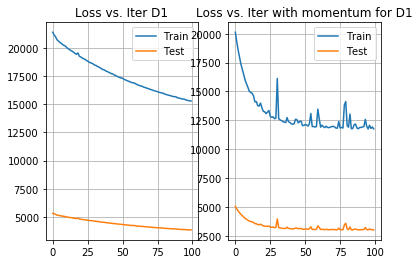

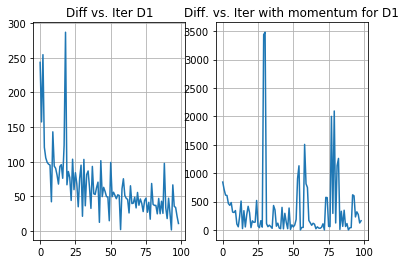

In [13]:
fix, ax = plt.subplots(1,2)
ax[0].plot(loss_train1)
ax[0].plot(loss_test1)
ax[0].legend(("Train", "Test"))
ax[0].grid()
ax[0].set_title("Loss vs. Iter D1")

ax[1].plot(loss_train1_m)
ax[1].plot(loss_test1_m)
ax[1].legend(("Train", "Test"))
ax[1].grid()
ax[1].set_title("Loss vs. Iter with momentum for D1")

fix, ax = plt.subplots(1,2)
ax[0].plot(diff_list1[1:])
ax[0].grid()
ax[0].set_title("Diff vs. Iter D1")

ax[1].plot(diff_list1_m[1:])
ax[1].grid()
ax[1].set_title("Diff. vs. Iter with momentum for D1")

epoch: 0
epoch: 10
epoch: 20
epoch: 30
epoch: 40
epoch: 50
epoch: 60
epoch: 70
epoch: 80
epoch: 90
epoch: 0
epoch: 25
epoch: 50
epoch: 75


Text(0.5,1,'Diff vs. Iter with momentum for D2')

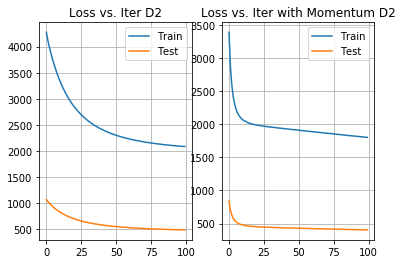

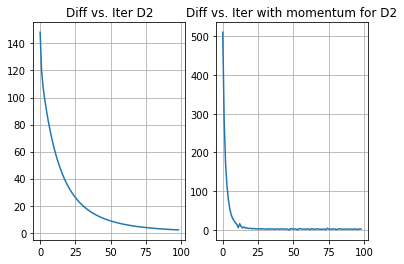

In [14]:
beta2, loss_train2, loss_test2, diff_list2= train(X_train2, y_train2, X_test2, y_test2, grad,100)
beta2_m, loss_train2_m, loss_test2_m, diff_list2_m = train_with_momentum(X_train2, y_train2, X_test2, y_test2, grad,100)

fix, ax = plt.subplots(1,2)
ax[0].plot(loss_train2)
ax[0].plot(loss_test2)
ax[0].legend(("Train", "Test"))
ax[0].grid()
ax[0].set_title("Loss vs. Iter D2")

ax[1].plot(loss_train2_m)
ax[1].plot(loss_test2_m)
ax[1].legend(("Train", "Test"))
ax[1].grid()
ax[1].set_title("Loss vs. Iter with Momentum D2")


fix, ax = plt.subplots(1,2)
ax[0].plot(diff_list2[1:])
ax[0].grid()
ax[0].set_title("Diff vs. Iter D2")

ax[1].plot(diff_list2_m[1:])
ax[1].grid()
ax[1].set_title("Diff vs. Iter with momentum for D2")

Observation: both datasets have different losses, however we can see that we momentum the convergence speed increase in both datasets. This show that moments permits to calcualte better gradients in each update of the stochastic gradient descent, since it somehow has a memory of the last iteration. Also, as the train log-likelihood increases, the test log-likehilhood also does. Without momentum, the intial difference between succesive steps were short, how ever with momentum the difference between them increased.

### Bold-driver



Now, we implement bold driver, which is also a method to choose a better step-length at each iteration.

In [20]:
def loss_function_stochastic(y, y_pred):
    
    '''This fucntion implements loss function for only one sample.
    It is intended to be used for stochastic gradient descent'''
    
    if(y[0]==1):
        loss=  -np.log(y_pred) 
    elif (y[0]==0):
        loss = -np.log(1-y_pred)
    return loss


def step_bold_driver1(X_train, y_train, beta, grad, learning_rate=0.000001):
    
    '''This function uses bold driver to find a suitable step-length.'''
    
    
    a1=1.000001
    a2=0.5
    l1 = loss_function_stochastic(y_train, sigmoid(X_train,beta))
    l2=loss_function_stochastic(y_train, sigmoid(X_train,beta+learning_rate*grad))

    learning_rate = learning_rate*a1

    while(l1<l2 ):
        learning_rate=learning_rate*a2
        l2= loss_function_stochastic(y_train, sigmoid(X_train,beta+learning_rate*grad))

    return learning_rate

def step_bold_driver(learning_rate, f_new, f_old):
    
    a1=1.1
    a2 = 0.5
    
    if(f_new<f_old):
        learning_rate = learning_rate*a1
    else:
        learning_rate = learning_rate*a2
        
    return learning_rate


def train_with_bold_driver(X_train, y_train, X_test, y_test, grad_function, max_iter, learning_rate=0.000000001):

    '''This function traind a logistic regression model using bold driver to find a suitbale step-length'''
    
    X_train = np.matrix(X_train)
    y_train = np.matrix(y_train).T
    X_test =np.matrix(X_test)
    y_test = np.matrix(y_test).T

    #initializing beta
    beta =  np.matrix(np.zeros((X_train.shape[1],1)))

    #training set size
    n_samples_train = X_train.shape[0]

    #index list
    idx = np.arange(0,n_samples_train)

    #initilaizing lists
    loss_train_list = []
    loss_test_list = []
    diff_list = []
    last_loss_train = 1e10
    print(max_iter)
    #iterating over max_iter
    for i in range(max_iter):
        if((i%25)==0):
            print("epoch:", i)

        #shuffling dataset indexes
        np.random.shuffle(idx)

        #calculating stochastic gradient using one sample per time
        for j in idx:
            
            #updating parameters
            g=grad_function(X_train[j,:], y_train[j], beta)
            beta = beta + learning_rate*g


        #saving values to track performance
        loss_train = loss_function(y_train, sigmoid(X_train, beta))
        loss_test = loss_function(y_test, sigmoid(X_test, beta))
        diff = np.abs(loss_train-last_loss_train)
        
        learning_rate = step_bold_driver(learning_rate, loss_train, last_loss_train)
        last_loss_train = loss_train

        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)
        diff_list.append(diff)
        
        if(diff==0): break
        
    return beta, loss_train_list, loss_test_list, diff_list

In [21]:
beta1, loss_train1, loss_test1, diff_list1= train_with_bold_driver(X_train1, y_train1, X_test1, y_test1, grad, 100, learning_rate=0.00000001)
beta2, loss_train2, loss_test2, diff_list2 = train_with_bold_driver(X_train2, y_train2, X_test2, y_test2, grad, 100, learning_rate=0.00000001)


100
epoch: 0
epoch: 25
epoch: 50
epoch: 75
100
epoch: 0
epoch: 25
epoch: 50
epoch: 75


Text(0.5,1,'Diff. loss vs. Iter. Dataset2')

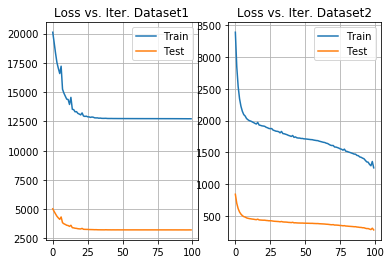

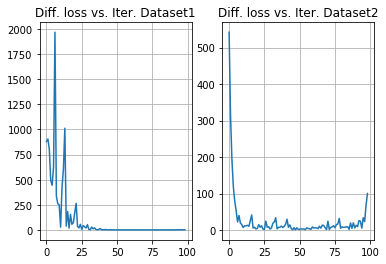

In [22]:
fix, ax = plt.subplots(1,2)
ax[0].plot(loss_train1)
ax[0].plot(loss_test1)
ax[0].legend(("Train", "Test"))
ax[0].grid()
ax[0].set_title("Loss vs. Iter. Dataset1")

ax[1].plot(loss_train2)
ax[1].plot(loss_test2)
ax[1].legend(("Train", "Test"))
ax[1].grid()
ax[1].set_title("Loss vs. Iter. Dataset2")

fix, ax = plt.subplots(1,2)
ax[0].plot(diff_list1[1:])
ax[0].grid()
ax[0].set_title("Diff. loss vs. Iter. Dataset1")

ax[1].plot(diff_list2[1:])
ax[1].grid()
ax[1].set_title("Diff. loss vs. Iter. Dataset2")


### Adagrad

We now implement Adragad, we uses an adaptative step length that invovles calculating the Hessian of the loss function. This produces a decrease in the step length at each iteration.

In [23]:
def train_with_adagrad(X_train, y_train, X_test, y_test, grad_function, max_iter, learning_rate=0.000000001):
    
    '''This function trains a logistic regression model using adagrad to find a suitable step length'''
   
    #transforming data typ
    X_train = np.matrix(X_train)
    y_train = np.matrix(y_train).T
    X_test =np.matrix(X_test)
    y_test = np.matrix(y_test).T

    #initializing beta
    beta =  np.matrix(np.zeros((X_train.shape[1],1)))
    h = np.matrix(np.zeros((X_train.shape[1],1)))
    #training set size
    n_samples_train = X_train.shape[0]

    #index list
    idx = np.arange(0,n_samples_train)

    #initilaizing lists
    loss_train_list = [] 
    loss_test_list = []
    diff_list = [] #list of difference between last loss and current loss for train set
    
    last_loss_train = 0


    #iterating over max_iter
    for i in range(max_iter):

        if((i%25)==0):
            print("epoch:", i)

        #shuffling dataset indexes
        np.random.shuffle(idx)

        #calculating stochastic gradient using one sample per time
        for j in idx:

            #updating parameters
            g=grad_function(X_train[j,:], y_train[j], beta)
            h = h + np.multiply(g, g)
            adagrad= np.multiply(1/np.sqrt(h), g)
            beta = beta + learning_rate*g

        #saving values to track performance
        loss_train = loss_function(y_train, sigmoid(X_train, beta))
        loss_test = loss_function(y_test, sigmoid(X_test, beta))
        diff = np.abs(loss_train-last_loss_train)
        last_loss_train = loss_train

        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)
        diff_list.append(diff)

        if(diff==0): break
        
    return beta, loss_train_list, loss_test_list, diff_list

In [24]:
beta1, loss_train1, loss_test1, diff_list1 = train_with_adagrad(X_train1, y_train1, X_test1, y_test1, grad, 100, learning_rate=0.00000001)
beta2, loss_train2, loss_test2, diff_list2 = train_with_adagrad(X_train2, y_train2, X_test2, y_test2, grad, 100, learning_rate=0.00000001)

epoch: 0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


epoch: 25
epoch: 50
epoch: 75
epoch: 0
epoch: 25
epoch: 50
epoch: 75


Text(0.5,1,'Diff. loss vs. Iter. Dataset2')

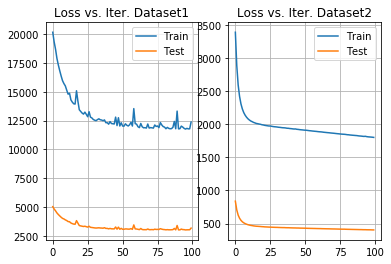

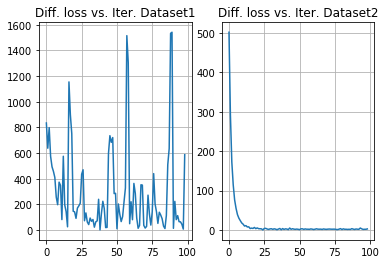

In [25]:
fix, ax = plt.subplots(1,2)
ax[0].plot(loss_train1)
ax[0].plot(loss_test1)
ax[0].legend(("Train", "Test"))
ax[0].grid()
ax[0].set_title("Loss vs. Iter. Dataset1")

ax[1].plot(loss_train2)
ax[1].plot(loss_test2)
ax[1].legend(("Train", "Test"))
ax[1].grid()
ax[1].set_title("Loss vs. Iter. Dataset2")

fix, ax = plt.subplots(1,2)
ax[0].plot(diff_list1[1:])
ax[0].grid()
ax[0].set_title("Diff. loss vs. Iter. Dataset1")

ax[1].plot(diff_list2[1:])
ax[1].grid()
ax[1].set_title("Diff. loss vs. Iter. Dataset2")

With Adagrad, in each iteration the step-length is reduced, so it is difficult to get better improvements in lot of iterations. Bold dirver, in the other hand, was able to modify dinamically the step-length so that it was still decrease in the losslog in a high number of iterations. As we can see comparing the plots for dataset2, Bold Driver was able to make a better improvement at high number of iterations. In Adagrad, we must update the step length constantly, which is also computationally expensive, while we only modify the step-length at the end of the iteration using Bold Driver.

## Conclusions

* Stochastic gradient descent permits optimize a function, aking step in the gradient direction of only a sample. However, it moves overall in the direction of the real gradient (accounting the whole dataset). SGD is slower than gradient descent since it makes computations over each sample. Nevertherless, it is a good optimion when the number of data samples is large and therefore calculating the whole gradient turns out to be expensive.
* Momentum improves convergence speed, since it tooks a direction of update improved by the direction of the last update. It even performs close as good as step length selection heuristics like bold driver and adagrad.
* Momentum, bold driver and adagrad have improved the speed convergence for both dataset, so they are a good compliment in the moment of using stochastic gradient descent. The difference between sucesive iterations is bigger using bold driver, momentum and adagrad, than without using it.
* For all the approaches, the higher the logloss in train set was, the higher the log-loss in test set was. This show a good generalization. In general, int he plots we can see that the test set log-l was higher than train-set but this happens because test set is shorter and therefore involves calculating log-loss with a summatory having less terms.